### web crawling
- 웹 서비스의 구조 : 서버 - 클라이언트
- 크롤링 방법 세가지
    - requests : json (동적 페이지)
        - 동적 페이지(URL의 변경 없이 데이터를 수정 및 추가)  
        - 네이버 주식 사이트에서 주가 데이터 크롤링
            - 시각화(정규화), 상관계수
    - requests: html 정적 페이지
        - URL 변경으로 데이터를 수정 및 추가
    - selenium : webdriver
        - 1, 2번 방법을 사용하지 못할 때 사용
        - 거의 모든 것을 다 할 수 있으나, 실제 해야되서 느릴 수 밖에 없다는 단점이 있다.
        
        
- 크롤링 절차
    - 웹서비스 분석 : URL
    - 요청, 응답 : str
    - str 데이터 파싱(dict, bs obj(css-selector)) 후 데이터 프레임으로 생성

## 네이버 주식 데이터 크롤링
### 클립명 : requests 1_ipython config_20191107_03

- 코스피 데이터 수집
- 코스닥 데이터 수집
- USD 환율 데이터 수집
- 그래프, 상관계수 확인

#### 크롤링 절차
- 1. 웹 서비스 분석 : URL 확인
- 2. requests, response : json 데이터(문자열) 을 얻기
- 3. json 데이터(문자열) -> dict(파싱) -> 데이터 프레임

```
코스피 데이터는 홈 -> 국내로 변경 되었습니다.
아래 URL 로 접속해주세요.

https://m.stock.naver.com/sise/siseList.nhn?menu=market_sum&sosok=0
``` 

In [41]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [1]:
# 1. 웹서비스 분석 : URL 확인
# 개발자도구 - Network - XHR

code, page_size, page = "KOSPI", 100, 1

url = "https://m.stock.naver.com/api/json/sise/\
dailySiseIndexListJson.nhn?code={}&pageSize={}&page={}".format(code, page_size, page)
url

'https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSPI&pageSize=100&page=1'

In [2]:
# 2. requests, response : JSON(str)

response = requests.get(url)
response

<Response [200]>

In [3]:
# 3. JSON(str) -> JSON(dict) -> DF

datas = response.json()["result"]["siseList"]
kospi_df = pd.DataFrame(datas)
kospi_df

,cd,dt,ncv,cv,cr,ov,hv,lv
0,KOSPI,20210913,3127.86,2.10,0.07,3117.35,3139.13,3109.01
1,KOSPI,20210910,3125.76,11.06,0.36,3121.09,3131.54,3103.38
2,KOSPI,20210909,3114.70,-48.29,-1.53,3146.64,3158.60,3111.49
3,KOSPI,20210908,3162.99,-24.43,-0.77,3178.74,3187.55,3157.07
4,KOSPI,20210907,3187.42,-15.91,-0.50,3200.07,3201.76,3176.81
...,...,...,...,...,...,...,...,...
95,KOSPI,20210428,3181.47,-33.95,-1.06,3217.21,3219.69,3176.55
96,KOSPI,20210427,3215.42,-2.11,-0.07,3218.30,3223.05,3203.25
97,KOSPI,20210426,3217.53,31.43,0.99,3191.34,3217.53,3191.34
98,KOSPI,20210423,3186.10,8.58,0.27,3173.47,3188.70,3146.54


#### 함수로 만들기

In [6]:
def get_stock_data(code, page_size=20, page=1):
    url = "https://m.stock.naver.com/api/json/sise/\
dailySiseIndexListJson.nhn?code={}&pageSize={}&page={}".format(code, page_size, page)
    response = requests.get(url)
    datas = response.json()["result"]["siseList"]
    
    return pd.DataFrame(datas)    

In [9]:
kosdaq_df = get_stock_data("KOSDAQ", 100)
kosdaq_df.tail()

,cd,dt,ncv,cv,cr,ov,hv,lv
95,KOSDAQ,20210428,998.27,-22.74,-2.23,1021.13,1021.13,995.96
96,KOSDAQ,20210427,1021.01,-9.05,-0.88,1030.29,1031.95,1019.81
97,KOSDAQ,20210426,1030.06,3.24,0.32,1027.40,1030.60,1025.73
98,KOSDAQ,20210423,1026.82,1.11,0.11,1024.29,1029.79,1018.87
99,KOSDAQ,20210422,1025.71,3.49,0.34,1023.65,1029.80,1023.43


#### USD 수집


In [14]:
# 1. 웹페이지 분석 : URL

# 강의 촬영 시점과 URL 이 다소 달라 졌습니다. 아래 URL 로 실습해주세요.
# 그리고 로그인이 필요없어져서 쿠키를 반드시 입력하지 않으셔도 됩니다.

code, page, page_size = "FX_USDKRW", 1, 100

url = "https://api.stock.naver.com/marketindex/exchange/\
{}/prices?page={}&pageSize={}".format(code, page, page_size)

print(url)

https://api.stock.naver.com/marketindex/exchange/FX_USDKRW/prices?page=1&pageSize=100


In [ ]:
# 2. 쿠키데이터 추가 요청
# 지금은 cookie 안 넣어도 됨.
params = {
    # network request header에 있는 것 복사 붙여넣기
    "cookie": ""
}
response = requests.get(url, headers=params)
response

In [15]:
# 2. request, response : JSON(str)
response = requests.get(url)
response

<Response [200]>

In [16]:
# 3. JSON(str) -> DF
datas = response.json()
usd_df = pd.DataFrame(datas)
usd_df

,localTradedAt,closePrice,fluctuations,fluctuationsRatio,fluctuationsType,cashBuyValue,cashSellValue,sendValue,receiveValue
0,2021-09-13,"1,175.00",5.00,0.43,"{'code': '2', 'text': '상승', 'name': 'RISING'}","1,195.56","1,154.44","1,186.50","1,163.50"
1,2021-09-10,"1,170.00",0.00,0.00,"{'code': '3', 'text': '보합', 'name': 'UNCHANGED'}","1,190.47","1,149.53","1,181.40","1,158.60"
2,2021-09-09,"1,170.00",3.00,0.26,"{'code': '2', 'text': '상승', 'name': 'RISING'}","1,190.47","1,149.53","1,181.40","1,158.60"
3,2021-09-08,"1,167.00",5.00,0.43,"{'code': '2', 'text': '상승', 'name': 'RISING'}","1,187.42","1,146.58","1,178.40","1,155.60"
4,2021-09-07,"1,162.00",5.00,0.43,"{'code': '2', 'text': '상승', 'name': 'RISING'}","1,182.33","1,141.67","1,173.30","1,150.70"
...,...,...,...,...,...,...,...,...,...
95,2021-04-28,"1,114.00",2.00,0.18,"{'code': '2', 'text': '상승', 'name': 'RISING'}","1,133.49","1,094.51","1,124.90","1,103.10"
96,2021-04-27,"1,112.00",1.00,0.09,"{'code': '2', 'text': '상승', 'name': 'RISING'}","1,131.46","1,092.54","1,122.80","1,101.20"
97,2021-04-26,"1,111.00",-6.50,-0.58,"{'code': '5', 'text': '하락', 'name': 'FALLING'}","1,130.44","1,091.56","1,121.80","1,100.20"
98,2021-04-23,"1,117.50",0.00,0.00,"{'code': '3', 'text': '보합', 'name': 'UNCHANGED'}","1,137.05","1,097.95","1,128.40","1,106.60"


현재는 위와 같이 날짜 표기가 달라졌습니다.

아래 코드를 활용하여 - 를 제거할 수 있습니다.

In [17]:
usd_df["localTradedAt"] = usd_df["localTradedAt"].replace("-", "", regex=True).astype(str)

In [19]:
# KOSPI 데이터 컬럼명과 일치하기 위해 수정합니다.
usd_df = usd_df.rename(columns={"fluctuations": "cv",
                      "fluctuationsRatio": "cr",
                      "localTradedAt": "dt",
                      "receiveValue": "rv",
                      "sendValue": "sv",
                      "cashBuyValue": "cbv",
                      "cashSellValue": "csv",
                      "closePrice": "nv"})

In [20]:
# 학습중에 사용하지 않는 컬럼은 삭제 합니다.
usd_df = usd_df.drop(['fluctuationsType'], axis=1)

In [28]:
print(usd_df["dt"].values)

['20210913' '20210910' '20210909' '20210908' '20210907' '20210906'
 '20210903' '20210902' '20210901' '20210831' '20210830' '20210827'
 '20210826' '20210825' '20210824' '20210823' '20210820' '20210819'
 '20210818' '20210817' '20210813' '20210812' '20210811' '20210810'
 '20210809' '20210806' '20210805' '20210804' '20210803' '20210802'
 '20210730' '20210729' '20210728' '20210727' '20210726' '20210723'
 '20210722' '20210721' '20210720' '20210719' '20210716' '20210715'
 '20210714' '20210713' '20210712' '20210709' '20210708' '20210707'
 '20210706' '20210705' '20210702' '20210701' '20210630' '20210629'
 '20210628' '20210625' '20210624' '20210623' '20210622' '20210621'
 '20210618' '20210617' '20210616' '20210615' '20210614' '20210611'
 '20210610' '20210609' '20210608' '20210607' '20210604' '20210603'
 '20210602' '20210601' '20210531' '20210528' '20210527' '20210526'
 '20210525' '20210524' '20210521' '20210520' '20210518' '20210517'
 '20210514' '20210513' '20210512' '20210511' '20210510' '20210

In [62]:
# 데이터 합치기

In [29]:
merge_df_1 = pd.merge(kospi_df, kosdaq_df, left_on="dt", right_on="dt")
merge_df_1.head(2)

,cd_x,dt,ncv_x,cv_x,cr_x,ov_x,hv_x,lv_x,cd_y,ncv_y,cv_y,cr_y,ov_y,hv_y,lv_y
0,KOSPI,20210913,3127.86,2.10,0.07,3117.35,3139.13,3109.01,KOSDAQ,1026.34,-11.57,-1.11,1036.86,1037.50,1023.98
1,KOSPI,20210910,3125.76,11.06,0.36,3121.09,3131.54,3103.38,KOSDAQ,1037.91,3.29,0.32,1035.86,1039.73,1026.97


In [33]:
merge_df_1 = merge_df_1.rename(columns={"ncv_x": "ncv_kospi", "ncv_y": "ncv_kosdaq"})
merge_df_1 = merge_df_1[["dt", "ncv_kospi", "ncv_kosdaq"]]
merge_df_1.tail(2)

,dt,ncv_kospi,ncv_kosdaq
98,20210423,3186.10,1026.82
99,20210422,3177.52,1025.71


In [35]:
usd_df.head(2)

,dt,nv,cv,cr,cbv,csv,sv,rv
0,20210913,"1,175.00",5.00,0.43,"1,195.56","1,154.44","1,186.50","1,163.50"
1,20210910,"1,170.00",0.00,0.00,"1,190.47","1,149.53","1,181.40","1,158.60"


In [36]:
merge_df = pd.merge(merge_df_1, usd_df)[["dt", "ncv_kospi", "ncv_kosdaq", "nv"]]
# nv 에는 1,117.50 형태로 되어 있어 float 으로 형변환이 자동으로 되지 않습니다. (, 로 인하여)
# 따라서 아래 코드를 실행하여 , 를 제거해주세요.

In [37]:
merge_df["nv"] = usd_df["nv"].replace(",", "", regex=True).astype(float)

In [38]:
merge_df

,dt,ncv_kospi,ncv_kosdaq,nv
0,20210913,3127.86,1026.34,1175.0
1,20210910,3125.76,1037.91,1170.0
2,20210909,3114.70,1034.62,1170.0
3,20210908,3162.99,1037.22,1167.0
4,20210907,3187.42,1054.43,1162.0
...,...,...,...,...
95,20210428,3181.47,998.27,1114.0
96,20210427,3215.42,1021.01,1112.0
97,20210426,3217.53,1030.06,1111.0
98,20210423,3186.10,1026.82,1117.5


In [97]:
# 그래프 그리기

In [43]:
from sklearn import preprocessing

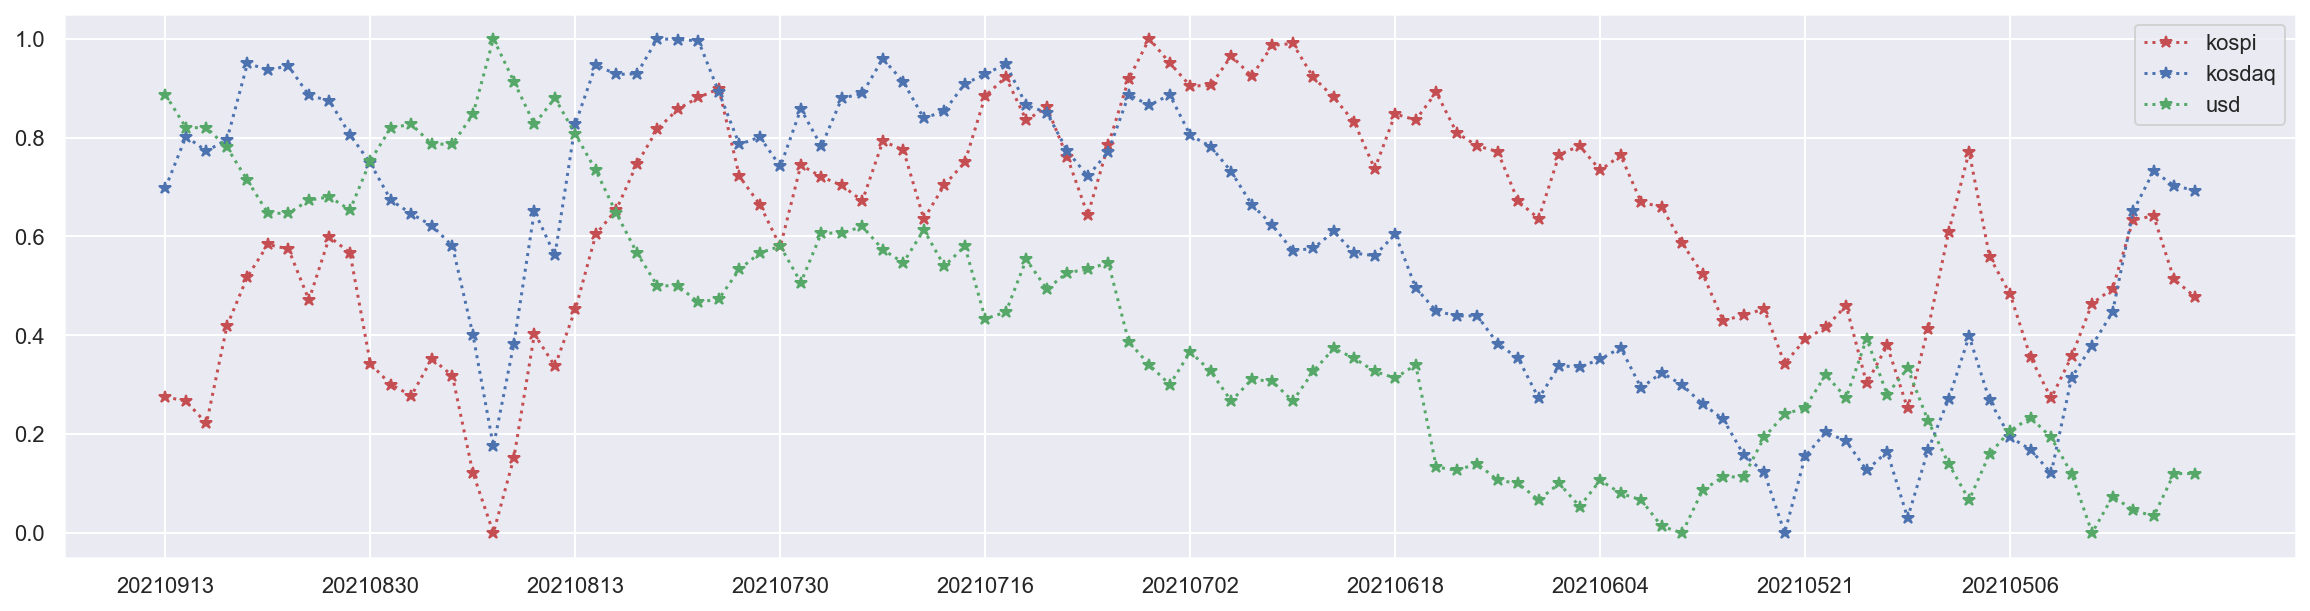

In [44]:
%matplotlib inline
plt.figure(figsize=(20, 5))
plt.plot(merge_df["dt"], preprocessing.minmax_scale(merge_df["ncv_kospi"]), "r*:", label="kospi")
plt.plot(merge_df["dt"], preprocessing.minmax_scale(merge_df["ncv_kosdaq"]), "b*:", label="kosdaq")
plt.plot(merge_df["dt"], preprocessing.minmax_scale(merge_df["nv"]), "g*:", label="usd")

plt.legend(loc=0)

# xtick 이 항상 10개 출력 되도록
step = len(merge_df) // 10
plt.xticks(merge_df[::step]["dt"])

plt.show()

In [48]:
merge_df[::step]["dt"]
# print(step)

0     20210913
10    20210830
20    20210813
30    20210730
40    20210716
50    20210702
60    20210618
70    20210604
80    20210521
90    20210506
Name: dt, dtype: object

##### 정규화 : Normalization
- z = (x - min(x)) / (max(x) - min(x))


In [89]:
from sklearn import preprocessing

In [90]:
preprocessing.minmax_scale(merge_df["ncv_kospi"])

array([0.93139062, 0.92207957, 1.        , 0.9652663 , 0.96491674,
       0.95810029, 0.93911275, 0.91798017, 0.86476738, 0.85887251,
       0.87695437, 0.86765921, 0.85124571, 0.84131499, 0.82855599,
       0.78819753, 0.7469175 , 0.7605504 , 0.70659082, 0.71448773,
       0.66256197, 0.64352676, 0.65685776, 0.70566925, 0.71213614,
       0.75421063, 0.7247998 , 0.75605377, 0.72195564, 0.73574743,
       0.67109445, 0.58278251, 0.61138299, 0.64314542, 0.69105123,
       0.71842824, 0.78119042, 0.71903203, 0.66990276, 0.80772531,
       0.64134994, 0.7606934 , 0.77604233, 0.82032541, 0.78702174,
       0.861812  , 0.90871679, 0.88289691, 0.80913944, 0.78385979,
       0.79429897, 0.8409972 , 0.78843587, 0.85537689, 0.80314923,
       0.73914771, 0.61152599, 0.75904093, 0.84406381, 0.87226706,
       0.9813938 , 0.87277552, 0.9048875 , 0.8313366 , 0.79655523,
       0.6714599 , 0.78581416, 0.88755243, 0.88494661, 0.84945024,
       0.88520084, 0.89112749, 0.69966315, 0.59881467, 0.63434

#### 상관계수

In [49]:
import numpy as np

In [54]:
np.corrcoef(merge_df["ncv_kospi"], merge_df["ncv_kosdaq"])

array([[1.        , 0.44521047],
       [0.44521047, 1.        ]])

In [50]:
np.corrcoef(merge_df["ncv_kospi"], merge_df["ncv_kosdaq"])[0, 1]

0.44521046910937406

In [51]:
np.corrcoef(merge_df["ncv_kospi"], merge_df["nv"])[0, 1]

-0.33787238073831705

In [52]:
np.corrcoef(merge_df["nv"], merge_df["ncv_kosdaq"])[0, 1]

0.5329807344503058